In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-life-expectancy-data/submissions.csv
/kaggle/input/predict-life-expectancy-data/train.csv
/kaggle/input/predict-life-expectancy-data/test.csv


In [45]:
# Import Libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 101)


In [3]:
#Load the train csv file
df = pd.read_csv('../input/predict-life-expectancy-data/train.csv', index_col = 0)

#Explore the first five rows
df.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [4]:
# Find number of rows and columns
df.shape

(362, 16)

In [5]:
#Explore the column types
df.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [6]:
#Description
df.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


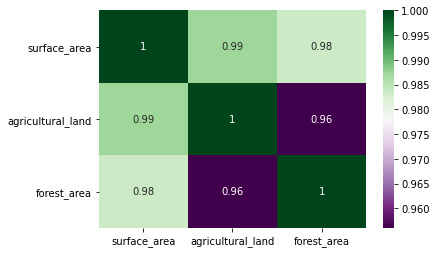

In [7]:
# Descriptive statistics shows in general surface area (total area of lands) is smaller than 'agricultural_land' and "forest_area" values which are a portion of total area. It seems there is some data entry problem. 
#Check if these three variables are highly correlated (multicolliearity problem)

sns.heatmap(df[['surface_area', 'agricultural_land', 'forest_area']].corr(), cmap = 'PRGn', annot = True);

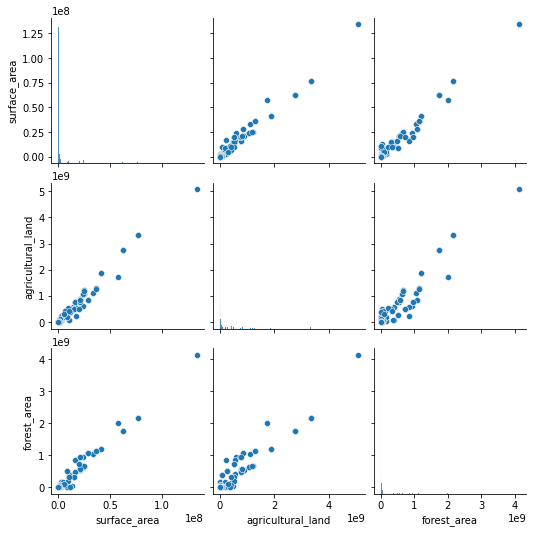

In [8]:
#Plot pairwise relationship and distribution of these three variables
sns.pairplot(df[['surface_area', 'agricultural_land', 'forest_area']])

In [9]:
#Strong linear relationship between these three factors. Mul surface area by 100, create two cols by dividing each of other two by surface area adn delete original two cols
# make a copy of the original dataframe

df1 = df.copy()

#Step1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area']*100

#Step2: Creates new variables
df1['agricultural_portion'] = df1['agricultural_land']/df1['surface_area']
df1['forest_portion'] = df1['forest_area']/df1['surface_area']

#Step3: Remove 'agricultural_land' and 'forest_area' columns from dataset
df1.drop(['agricultural_land', 'forest_area'], axis = 1, inplace = True)

#Show the first 10 row of df1
df1.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,7.526100e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706
5,7.835600e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224
6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839
7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076
8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452
10,7.160000e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586


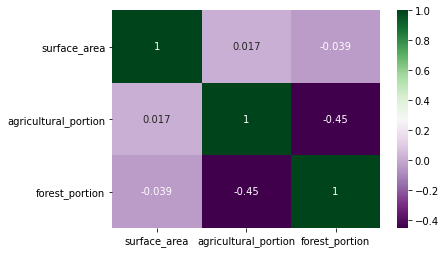

In [10]:
# Re-check correlations among 'surface_area', 'agriculture_portion' and 'forest_protion' for multicollinearlity
sns.heatmap(df1[['surface_area', 'agricultural_portion', 'forest_portion']].corr(), cmap = 'PRGn', annot = True);

In [11]:
#The variable description indicates 'inflation_annual', 'inflation_monthly' and 'inflation_weekly' are linearly dependent
# We will keep 'inflation_annual' and replace its NaN values with info from other two columns if possible
#check missing values 

df1.isnull().sum()

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64

In [12]:
# Replace missing values in column 'inflation_annual' with information from columns 'inflation_monthly' & 'inflation_weekly'

for i in df1.index:
    if np.isnan(df1.loc[i, 'inflation_annual']):
        if np.isnan(df1.loc[i, 'inflation_monthly']):
            df1.loc[i, 'inflation_annual'] = 52 * df1.loc[i, 'inflation_weekly']
        else:
            df1.loc[i, 'inflation_annual'] = 12 * df1.loc[i, 'inflation_monthly']
            
 #Remove columns 'inflation_monthly' & 'inflation_weekly'
df1.drop(['inflation_monthly', 'inflation_weekly'], axis = 1, inplace = True)

df1.isnull().sum()
                

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agricultural_portion              4
forest_portion                    5
dtype: int64

In [13]:
# Convert categorical and ordinal features into numeric features
#Decide which categorical variables you want to use in model

for col_name in df1.columns:
    if df1[col_name].dtypes == 'object':
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name = col_name, unique_cat = unique_cat))

Feature 'national_income' has 7 unique categories
Feature 'mobile_subscriptions' has 5 unique categories
Feature 'internet_users' has 198 unique categories
Feature 'improved_sanitation' has 6 unique categories
Feature 'women_parliament_seats_rate' has 4 unique categories


In [14]:
#There are too many categories in 'internet_users'. Its more similar to a numeric feature! Let's check
#Explore values in 'internet_users' column
df1['internet_users']

0        0 per 1000 people
1      154 per 1000 people
2        90 per 100 people
3        76 per 100 people
4      350 per 1000 people
              ...         
457      90 per 100 people
458      84 per 100 people
459      58 per 100 people
460      44 per 100 people
461      45 per 100 people
Name: internet_users, Length: 362, dtype: object

In [15]:
#Convert 'internet_users' column to associated percentages
variable_split = df1['internet_users'].str.split()
df1['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors = 'coerce')/pd.to_numeric(variable_split.str.get(2), errors = 'coerce'))

#Remove 'internet_users' column
df1.drop('internet_users', axis = 1, inplace = True)
df1.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,less than 1 per person,NaN,high access,[0%-25%),69.494195,0.218420,0.449464,0.000
1,75261000.0,16500.0,16.890687,23.136313,very low,6.977676,less than 1 per person,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715,0.154
2,139600.0,NaN,18.390090,23.139910,unknown,NaN,more than 1 per person,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573,0.900
3,275881200.0,1518650.0,50.966885,24.522427,high,1.374906,more than 1 per person,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940,0.760
4,34000.0,NaN,5.311885,30.271115,unknown,-0.044229,more than 1 per person,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706,0.350


In [16]:
#Check the frequency of categories (labels) in each categorical variable
for name in df1.select_dtypes(include = ['object']):
    print(name, ':')
    print(df1[name].value_counts(), '\n')

national_income :
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: national_income, dtype: int64 

mobile_subscriptions :
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: mobile_subscriptions, dtype: int64 

improved_sanitation :
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: improved_sanitation, dtype: int64 

women_parliament_seats_rate :
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: women_parliament_seats_rate, dtype: int64 



In [17]:
#Assign 'mobile_subscriptions' values to 1 if mobile subscriptions is less than 1 person, otherwise 2:
df1['mobile_subscriptions'] = [1 if x == 'less than 1 person' else 2 for x in df1['mobile_subscriptions']]

In [18]:
#Assign 'women_parliament_seats_rate' to 1 if women_parliament seat_rate is [0%-25%), 2 if it is 25 % - 75%, or 3 if unknown:

df1['women_parliament_seats_rate'] = (df1['women_parliament_seats_rate'].replace('[0%-25%)', 1))

df1['women_parliament_seats_rate'] = (df1['women_parliament_seats_rate'].replace('[25%-50%)', 2))

df1['women_parliament_seats_rate'] = (df1['women_parliament_seats_rate'].replace('[50%-75%)', 2))

df1['women_parliament_seats_rate'] = (df1['women_parliament_seats_rate'].replace('unknown', 3))




In [19]:
#Assign numeric values to the levels of 'national_income' (ordinal variable):

mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3, 'medium high': 4, 'high': 5, 'very high': 6, 'unknown': 7}

df1['national_income'].replace(mapper_1, inplace = True)

In [20]:
#Assign numeric values to the levels of improved sanitation" (ordinal variable):

mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3, 'high access': 4, 'very high access': 5, 'no info': 6}
df1['improved_sanitation'].replace(mapper_2, inplace = True)

In [21]:
#Handling missing data
#make a copy of df1
df2 = df1.copy()
# How much of your data is missing? 
df2.isnull().sum().sort_values(ascending = False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
percent_internet_users            6
forest_portion                    5
agricultural_portion              4
urban_pop_major_cities            2
urban_pop_minor_cities            2
surface_area                      0
national_income                   0
mobile_subscriptions              0
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
dtype: int64

In [22]:
# Impute missing values using Simple Imputer in sklearn.impute

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp = imp.fit(df2)
df2 = pd.DataFrame(data = imp.transform(df2), columns = df2.columns)
df2.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,1.205400e+07,1379000.0,55.747169,4.688831,7.0,3.371067,2.0,2.671228e+07,4.0,1.0,69.494195,0.218420,0.449464,0.000
1,7.526100e+07,16500.0,16.890687,23.136313,1.0,6.977676,2.0,2.623624e+06,2.0,1.0,59.237366,0.319294,0.658715,0.154
2,1.396000e+05,53525.0,18.390090,23.139910,7.0,3.371067,2.0,1.656589e+09,6.0,3.0,81.300000,0.021490,0.000573,0.900
3,2.758812e+08,1518650.0,50.966885,24.522427,5.0,1.374906,2.0,6.625072e+08,5.0,2.0,81.373197,0.445426,0.380940,0.760
4,3.400000e+04,53525.0,5.311885,30.271115,7.0,-0.044229,2.0,2.832808e+07,5.0,2.0,73.193561,0.323529,0.499706,0.350
5,7.835600e+07,612800.0,37.699524,34.134476,2.0,8.891570,2.0,1.166004e+08,5.0,1.0,74.862439,0.499032,0.148224,0.450
6,2.846040e+09,5032780.0,32.853558,37.469387,4.0,2.773339,2.0,4.702241e+08,5.0,1.0,76.569368,0.294847,0.379839,0.640
7,5.490910e+07,325600.0,24.582761,54.237239,5.0,1.955685,2.0,4.093085e+08,5.0,2.0,81.968293,0.526820,0.304076,0.810
8,3.571700e+07,186450.0,18.091168,56.596832,5.0,2.008491,2.0,1.110775e+09,5.0,2.0,80.892683,0.478109,0.327452,0.820
9,7.160000e+04,147600.0,51.288344,48.711656,7.0,4.528651,2.0,6.353061e+08,5.0,1.0,81.995122,0.010340,0.231586,0.720


In [23]:
#Visualization, Modeling, Machine Learning
#Can you construct a reliable model that predicts the life expectancy of an area (country, region, group of countries)
# using socioeconomic variables and identify how different features influence their decision? 
def plot_histogram(x):
    plt.hist(x, color = 'gray', edgecolor = 'black', alpha = 0.8)
    plt.title("Histogram of '{var_name}'".format(var_name = x.name))
    plt.xlabel('value')
    plt.ylabel('Frequency')
    plt.show()

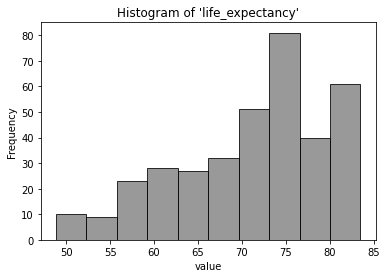

In [24]:
#Plot distribution of target(outcome) variable in the training data
plot_histogram(df2['life_expectancy'])

In [25]:
#Loading test data
test_data = pd.read_csv('../input/predict-life-expectancy-data/test.csv', index_col = 0)
test_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
9,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
16,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
19,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
23,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
28,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)


In [26]:
#Create a copy of test dataframe
tdf = test_data.copy()

#Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area']*100

#step 2: Creates new variables
tdf['agricultural_portion']= tdf['agricultural_land']/tdf['surface_area']
tdf['forest_portion'] = tdf['forest_area']/tdf['surface_area']

#Step 3: Remove 'agricultural_land' and 'forest_area' columns from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis = 1, inplace = True)

#Step4: Replace missing values in column 'inflation_annual' with information from
#columns 'inflation_monthly' & 'inflation_weekly'
for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']
            
 #Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis = 1, inplace = True)

# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'].replace(mapper_1, inplace=True)

# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
tdf['improved_sanitation'].replace(mapper_2, inplace=True)

# Step12: Impute missing values using Imputer in sklearn.preprocessing
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp = imp.fit(tdf)
tdf = pd.DataFrame(data = imp.transform(tdf), columns = tdf.columns)
tdf.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,agricultural_portion,forest_portion,percent_internet_users
0,3.224600e+07,50800.0,0.846584,51.919416,3.0,2.569961,1.0,1849926.0,1.0,1.0,0.647799,0.327101,0.084
1,5.131200e+07,453550.0,42.139810,5.803190,3.0,2.184886,2.0,17983312.0,5.0,1.0,0.432774,0.319814,0.289
2,1.858000e+06,50800.0,1.699056,67.396944,7.0,3.009844,1.0,240458015.0,5.0,3.0,0.100766,0.458972,0.660
3,1.124900e+07,20000.0,48.602426,4.934574,3.0,5.161899,1.0,9427882.0,4.0,1.0,0.289123,0.431853,0.178
4,7.835600e+07,612800.0,43.734006,28.635994,2.0,7.493090,1.0,50379814.0,5.0,1.0,0.499240,0.149555,0.460
5,5.279700e+07,137900.0,8.744626,24.705374,1.0,3.009844,1.0,626635.0,6.0,1.0,0.445972,0.010398,0.200
6,3.000000e+04,50800.0,35.083578,8.332422,2.0,2.314011,2.0,85443065.0,5.0,1.0,0.263333,0.033333,0.440
7,1.303700e+07,12000.0,0.980363,57.165637,3.0,7.135381,2.0,8577705.0,3.0,2.0,0.420891,0.258767,0.155
8,1.315284e+09,2866760.0,16.267914,40.853782,2.0,3.160410,2.0,14444191.0,4.0,1.0,0.381331,0.028384,0.323
9,2.974000e+06,49100.0,21.673721,41.487279,3.0,2.555471,2.0,26860609.0,4.0,1.0,0.591149,0.116403,0.375


In [27]:
#Random Forest Regression 
#Create outcome and input DataFrames
y = df2['life_expectancy']
X = df2.drop('life_expectancy', axis = 1)
y.head()

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [28]:
#Create train and validation datasets to build the Random Forest (RF) regression
#model and find the best set of the model parameters

X_train, X_validation, y_train, y_validation = train_test_split(X, y )

In [29]:
#Using randomized search cv to find best set of RF regression parameters
n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
best_score = 100

#Create random grid
random_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth':max_depth, 
              'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                              cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

#Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 7}

In [30]:
#Fit a RF using best identified parameters
rf = RandomForestRegressor(n_estimators = 150, criterion = 'mae', max_features = 4, random_state = 42, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=7, max_features=4,
                      n_estimators=150, random_state=42)

In [31]:
#Predict test instances using test dataframe(tdf)
y_predict_RF = rf.predict(X_validation)
y_predict_RF

array([76.96522172, 80.2088421 , 62.57038543, 77.84856614, 73.99577758,
       69.43623506, 62.57427209, 70.51353808, 72.17582912, 74.27605508,
       61.90952441, 65.54797067, 60.92278693, 60.79514737, 77.223477  ,
       78.46211766, 74.16692628, 74.14612705, 59.93981688, 60.05635523,
       73.86118327, 75.26387896, 66.78198219, 77.56242134, 74.91236687,
       80.23927967, 71.80835986, 74.67102455, 58.45355459, 76.09637395,
       66.6310772 , 74.35984498, 60.29601262, 65.40481683, 62.53236127,
       78.38513915, 61.4026577 , 68.55178326, 75.09590673, 67.26697951,
       78.17960641, 80.99249698, 65.08848162, 77.46058322, 61.95591936,
       74.18750608, 76.42898893, 78.82113132, 65.78102263, 61.13801804,
       60.42976422, 63.08811782, 80.91891483, 74.00397393, 58.98026495,
       61.72905693, 74.5544857 , 67.26538699, 77.55208262, 73.77990629,
       68.99844044, 59.45360747, 64.45080275, 73.69397561, 71.99898757,
       69.42980637, 75.46755896, 74.46480276, 71.20914716, 58.63

In [32]:
score_RF = mean_absolute_error(y_validation, y_predict_RF)
score_RF

2.949509909969594

In [33]:
#Plt histograms to compare distribution of actual outcomes vs prediction
def plot_histogram_comp(x, y):
    plt.hist(x, alpha = 0.5, edgecolor = 'black', label = 'Actual')
    plt.hist(y, alpha = 0.5, edgecolor = 'black', label = 'Prediction')
    plt.title('Histogram of actual outcomes v.s predicted outcomes')
    plt.xlabel('value')
    plt.ylabel('Frequency')
    plt.legend(loc = 'upper left')
    plt.show()

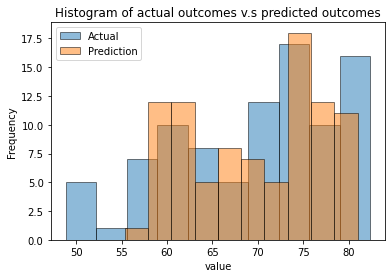

In [34]:
#Check to see if distribution of actual target values is close to the
#distribution of predicted target values
plot_histogram_comp(y_validation, y_predict_RF)

<AxesSubplot:>

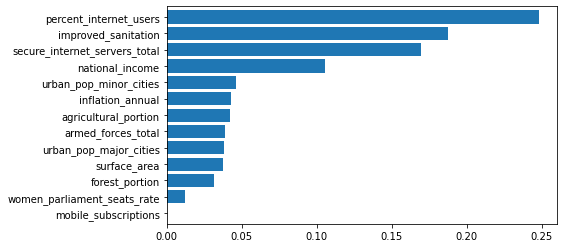

In [35]:
#Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index = X_train.columns)
feature_imp.sort_values(ascending = True, inplace = True)

#Creating a bar plot
feature_imp.plot(kind = 'barh', width = 0.8, figsize = (7,4))


In [37]:
#Use 'randomized search cv' to find the best set of GB regression parameters

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
best_score = 100

#Create random grid
random_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth':max_depth, 
              'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

gb = GradientBoostingRegressor()
gb_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                              cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

#Fit the random search model
gb_random.fit(X_train, y_train)
gb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 7}

In [39]:
#Fit a GB using best identified parameters
gb = GradientBoostingRegressor(n_estimators = 200 , criterion = 'mse', max_features = 4, random_state = 42, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=7, max_features=4,
                          n_estimators=200, random_state=42)

In [40]:
# Predict for X_validation 
y_prediction_GB = gb.predict(X_validation)
y_prediction_GB

array([78.05911984, 80.54495849, 60.41395048, 78.71923539, 75.50503063,
       69.38552791, 61.45506119, 69.74984979, 71.83482749, 74.6008856 ,
       63.78651505, 64.39071175, 60.62195335, 60.57595355, 76.33613467,
       77.18416286, 74.04589092, 72.90304004, 57.7493463 , 60.72319932,
       73.73024245, 76.69249541, 68.45046928, 77.91740941, 75.66470253,
       80.91790683, 72.0225302 , 74.05883863, 58.62032338, 77.53322525,
       66.33799342, 74.9461302 , 61.15870395, 66.16979179, 65.01132209,
       77.30165636, 62.95031285, 70.39980419, 76.39712768, 63.52701825,
       77.95442888, 81.52827594, 62.4354378 , 77.94481538, 62.61170835,
       71.58621209, 77.1438625 , 79.17608354, 64.8185268 , 61.01461599,
       58.36833666, 64.39608773, 81.13676559, 74.77222969, 58.17075253,
       61.05340479, 76.33400391, 69.31885778, 78.03093015, 73.74470587,
       70.55377895, 61.90299393, 64.12311887, 73.64991478, 71.68381857,
       69.68565004, 75.36825474, 74.96353499, 73.53188667, 57.96

<AxesSubplot:>

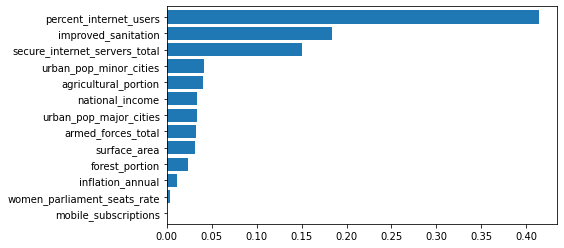

In [41]:
# Extract feature importance determined by GB model

feature_imp = pd.Series(gb.feature_importances_, index=X_train.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4))

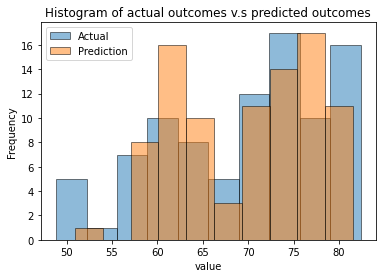

In [42]:
#Check to see if distribution of actual target values is close to teh distribution
#of predicted target values 

plot_histogram_comp(y_validation, y_prediction_GB)

In [47]:
score_gb = mean_squared_error(y_validation, y_prediction_GB)
score_gb**0.5

4.0971550626726

In [48]:
# Create a submission_df
y_test = rf.predict(tdf)
d = {'id':test_data.index, 'life_expectancy':y_test}
submission_df = pd.DataFrame(data = d)
submission_df

,id,life_expectancy
0,9,62.822726
1,16,72.339347
2,19,77.188695
3,23,69.544426
4,28,73.826957
...,...,...
95,433,57.389185
96,441,77.138540
97,443,70.647777
98,453,66.991079


In [49]:
#Submission
submission_df.to_csv('submissions.csv', index = False)